In [1]:
import datetime
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib as mpl
import statsmodels.api as sm
import pylab as py
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
import altair as alt


from utils.figsize import *

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

/var/folders/4q/rq930f513t9ct674p8_0zly80000gn/T/ipykernel_3836/4254133157.py:17: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
df = pd.read_parquet('daily_20221004.parquet.gzip')
df.head()

time_open  \
symbol_id time_close                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:00:00.000Z   
          2020-11-24T00:59:59.999Z  2020-11-24T00:00:00.000Z   
          2020-11-25T00:59:59.999Z  2020-11-25T00:00:00.000Z   
          2020-11-26T00:59:59.999Z  2020-11-26T00:00:00.000Z   
          2020-11-27T00:59:59.999Z  2020-11-27T00:00:00.000Z   

                                                   time_high  \
symbol_id time_close                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:00:07.000Z   
          2020-11-24T00:59:59.999Z  2020-11-24T00:00:07.000Z   
          2020-11-25T00:59:59.999Z  2020-11-25T00:00:06.000Z   
          2020-11-26T00:59:59.999Z  2020-11-26T00:56:05.000Z   
          2020-11-27T00:59:59.999Z  2020-11-27T00:57:05.000Z   

                                                    time_low  quote.USD.open  \
symbol_id time_close                                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:37:05.000Z       90.554933   
          2020-11-24T00:59:59.999Z  2020-11-24T00:40:06.000Z       85.161030   
          2020-11-25T00:59:59.999Z  2020-11-25T00:58:05.000Z       57.527366   
          2020-11-26T00:59:59.999Z  2020-11-26T00:13:06.000Z       39.466839   
          2020-11-27T00:59:59.999Z  2020-11-27T00:16:05.000Z       30.002092   

                                    quote.USD.high  quote.USD.low  \
symbol_id time_close                                                
MPH_7742  2020-11-23T00:59:59.999Z       90.554933      79.852330   
          2020-11-24T00:59:59.999Z       85.161030      80.694133   
          2020-11-25T00:59:59.999Z       57.527366      53.679986   
          2020-11-26T00:59:59.999Z       40.121814      38.980499   
          2020-11-27T00:59:59.999Z       30.391962      29.690305   

                                    quote.USD.close  quote.USD.volume  \
symbol_id time_close                                                    
MPH_7742  2020-11-23T00:59:59.999Z        85.599205      1.600851e+07   
          2020-11-24T00:59:59.999Z        81.645754      1.009738e+07   
          2020-11-25T00:59:59.999Z        53.704963      8.899399e+06   
          2020-11-26T00:59:59.999Z        40.056399      4.225065e+06   
          2020-11-27T00:59:59.999Z        30.383005      2.933446e+06   

                                    quote.USD.market_cap  \
symbol_id time_close                                       
MPH_7742  2020-11-23T00:59:59.999Z                   0.0   
          2020-11-24T00:59:59.999Z                   0.0   
          2020-11-25T00:59:59.999Z                   0.0   
          2020-11-26T00:59:59.999Z                   0.0   
          2020-11-27T00:59:59.999Z                   0.0   

                                         quote.USD.timestamp symbol    id  
symbol_id time_close                                                       
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:59:59.999Z    MPH  7742  
          2020-11-24T00:59:59.999Z  2020-11-24T00:59:59.999Z    MPH  7742  
          2020-11-25T00:59:59.999Z  2020-11-25T00:59:59.999Z    MPH  7742  
          2020-11-26T00:59:59.999Z  2020-11-26T00:59:59.999Z    MPH  7742  
          2020-11-27T00:59:59.999Z  2020-11-27T00:59:59.999Z    MPH  7742

In [3]:
df.index

MultiIndex([('MPH_7742', '2020-11-23T00:59:59.999Z'),
            ('MPH_7742', '2020-11-24T00:59:59.999Z'),
            ('MPH_7742', '2020-11-25T00:59:59.999Z'),
            ('MPH_7742', '2020-11-26T00:59:59.999Z'),
            ('MPH_7742', '2020-11-27T00:59:59.999Z'),
            ('MPH_7742', '2020-11-28T00:59:59.999Z'),
            ('MPH_7742', '2020-11-29T00:59:59.999Z'),
            ('MPH_7742', '2020-11-30T00:59:59.999Z'),
            ('MPH_7742', '2020-12-01T00:59:59.999Z'),
            ('MPH_7742', '2020-12-02T00:59:59.999Z'),
            ...
            ('CXO_2490', '2022-06-26T00:59:59.999Z'),
            ('CXO_2490', '2022-06-27T00:59:59.999Z'),
            ('CXO_2490', '2022-06-28T00:59:59.999Z'),
            ('CXO_2490', '2022-06-29T00:59:59.999Z'),
            ('CXO_2490', '2022-06-30T00:59:59.999Z'),
            ('CXO_2490', '2022-07-01T00:59:59.999Z'),
            ('CXO_2490', '2022-07-02T00:59:59.999Z'),
            ('CXO_2490', '2022-07-03T00:59:59.999Z'),
            

<AxesSubplot:>

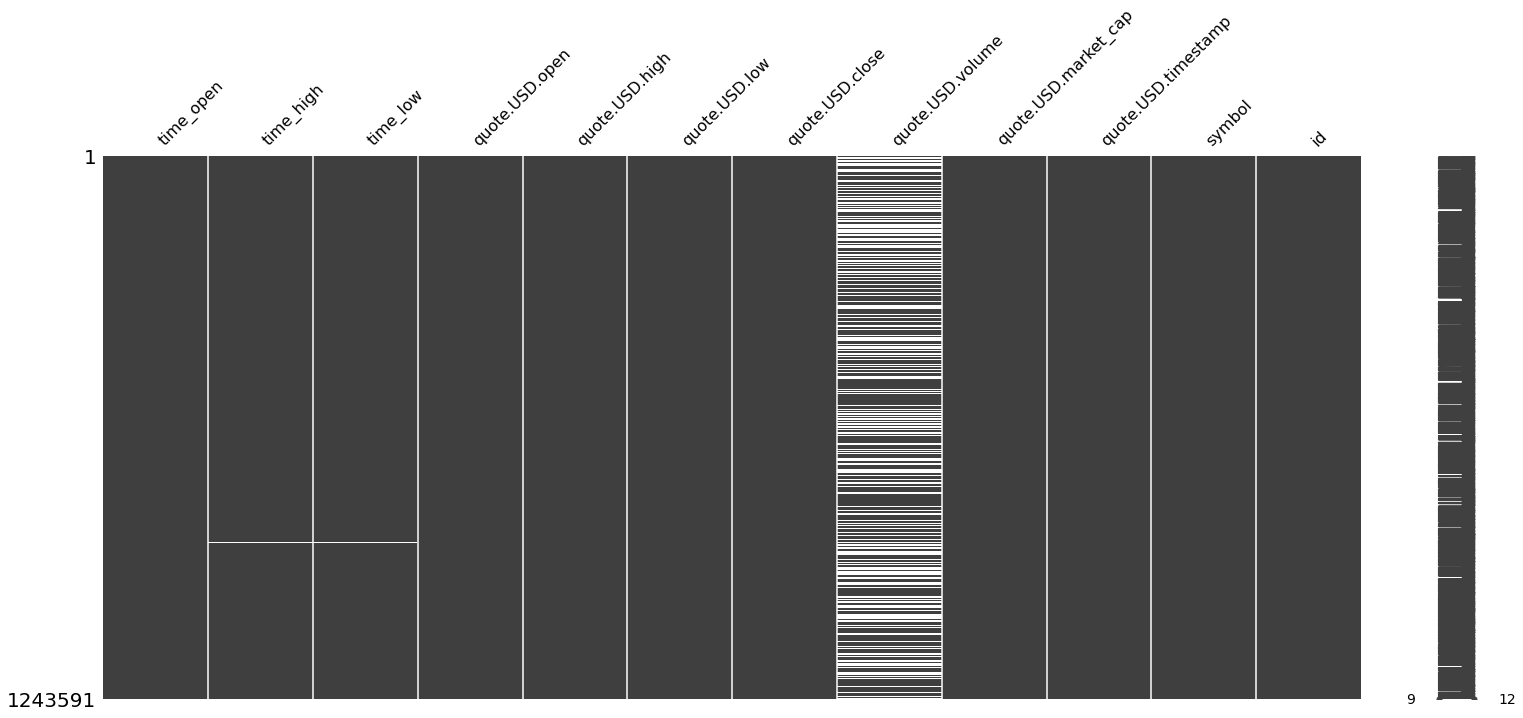

In [4]:
msno.matrix(df)
##check missing data

In [5]:
df['uid'] = df.symbol.astype(str)+df['id'].astype(str)
df_volmiss = df.loc[pd.isnull(df['quote.USD.volume'])]
df_nomiss = df.loc[~ pd.isnull(df['quote.USD.volume'])]
df.head()

time_open  \
symbol_id time_close                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:00:00.000Z   
          2020-11-24T00:59:59.999Z  2020-11-24T00:00:00.000Z   
          2020-11-25T00:59:59.999Z  2020-11-25T00:00:00.000Z   
          2020-11-26T00:59:59.999Z  2020-11-26T00:00:00.000Z   
          2020-11-27T00:59:59.999Z  2020-11-27T00:00:00.000Z   

                                                   time_high  \
symbol_id time_close                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:00:07.000Z   
          2020-11-24T00:59:59.999Z  2020-11-24T00:00:07.000Z   
          2020-11-25T00:59:59.999Z  2020-11-25T00:00:06.000Z   
          2020-11-26T00:59:59.999Z  2020-11-26T00:56:05.000Z   
          2020-11-27T00:59:59.999Z  2020-11-27T00:57:05.000Z   

                                                    time_low  quote.USD.open  \
symbol_id time_close                                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:37:05.000Z       90.554933   
          2020-11-24T00:59:59.999Z  2020-11-24T00:40:06.000Z       85.161030   
          2020-11-25T00:59:59.999Z  2020-11-25T00:58:05.000Z       57.527366   
          2020-11-26T00:59:59.999Z  2020-11-26T00:13:06.000Z       39.466839   
          2020-11-27T00:59:59.999Z  2020-11-27T00:16:05.000Z       30.002092   

                                    quote.USD.high  quote.USD.low  \
symbol_id time_close                                                
MPH_7742  2020-11-23T00:59:59.999Z       90.554933      79.852330   
          2020-11-24T00:59:59.999Z       85.161030      80.694133   
          2020-11-25T00:59:59.999Z       57.527366      53.679986   
          2020-11-26T00:59:59.999Z       40.121814      38.980499   
          2020-11-27T00:59:59.999Z       30.391962      29.690305   

                                    quote.USD.close  quote.USD.volume  \
symbol_id time_close                                                    
MPH_7742  2020-11-23T00:59:59.999Z        85.599205      1.600851e+07   
          2020-11-24T00:59:59.999Z        81.645754      1.009738e+07   
          2020-11-25T00:59:59.999Z        53.704963      8.899399e+06   
          2020-11-26T00:59:59.999Z        40.056399      4.225065e+06   
          2020-11-27T00:59:59.999Z        30.383005      2.933446e+06   

                                    quote.USD.market_cap  \
symbol_id time_close                                       
MPH_7742  2020-11-23T00:59:59.999Z                   0.0   
          2020-11-24T00:59:59.999Z                   0.0   
          2020-11-25T00:59:59.999Z                   0.0   
          2020-11-26T00:59:59.999Z                   0.0   
          2020-11-27T00:59:59.999Z                   0.0   

                                         quote.USD.timestamp symbol    id  \
symbol_id time_close                                                        
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:59:59.999Z    MPH  7742   
          2020-11-24T00:59:59.999Z  2020-11-24T00:59:59.999Z    MPH  7742   
          2020-11-25T00:59:59.999Z  2020-11-25T00:59:59.999Z    MPH  7742   
          2020-11-26T00:59:59.999Z  2020-11-26T00:59:59.999Z    MPH  7742   
          2020-11-27T00:59:59.999Z  2020-11-27T00:59:59.999Z    MPH  7742   

                                        uid  
symbol_id time_close                         
MPH_7742  2020-11-23T00:59:59.999Z  MPH7742  
          2020-11-24T00:59:59.999Z  MPH7742  
          2020-11-25T00:59:59.999Z  MPH7742  
          2020-11-26T00:59:59.999Z  MPH7742  
          2020-11-27T00:59:59.999Z  MPH7742

Check whether the symbol ids of missing and not missing volume are clapped

In [6]:
clap_id = []
for id in df_volmiss['uid']:
    if id in df_nomiss['uid']:
        clap_id.append(id)
        
clap_id

[]

In [7]:
#make unique idea totally same as symbol id
df_nomiss['uid'] = df_nomiss['symbol'].astype(str)+"_"+df_nomiss['id'].astype(str)

/var/folders/4q/rq930f513t9ct674p8_0zly80000gn/T/ipykernel_3836/60781690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nomiss['uid'] = df_nomiss['symbol'].astype(str)+"_"+df_nomiss['id'].astype(str)


In [8]:
df_nomiss.uid.unique()

array(['MPH_7742', 'EWT_5268', 'BAKE_7064', ..., 'UNI_7083', 'QC_2319',
       'CXO_2490'], dtype=object)

In [9]:
len(df_nomiss.uid.unique())

1373

In [10]:
df_nomiss.dtypes

time_open                object
time_high                object
time_low                 object
quote.USD.open          float64
quote.USD.high          float64
quote.USD.low           float64
quote.USD.close         float64
quote.USD.volume        float64
quote.USD.market_cap    float64
quote.USD.timestamp      object
symbol                   object
id                        int64
uid                      object
dtype: object

In [11]:
df_nomiss.describe()

,quote.USD.open,quote.USD.high,quote.USD.low,quote.USD.close,quote.USD.volume,quote.USD.market_cap,id
count,742019.000000,742019.000000,742019.000000,742019.000000,7.420190e+05,7.420190e+05,742019.000000
mean,383.585019,386.354827,380.577230,383.491923,1.212272e+10,1.659988e+09,5578.673820
std,4119.116415,4149.026474,4085.289680,4117.638080,5.749468e+12,2.628066e+10,3256.601799
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.366289e+09,1.000000
25%,0.033748,0.034197,0.033309,0.033730,2.212874e+05,8.464712e+06,2861.000000
50%,0.287513,0.290885,0.283841,0.287182,1.460568e+06,3.178227e+07,5224.000000
75%,2.014665,2.038999,1.987739,2.011999,1.147851e+07,1.387857e+08,7805.000000
max,171010.561474,173384.631108,170383.538156,173384.631108,3.665774e+15,1.276428e+12,20701.000000


In [12]:
## add the date (adjust the form of timestamp)
df_nomiss['date'] = df_nomiss['quote.USD.timestamp'].str[:10]
df_nomiss['date'] = pd.to_datetime(df_nomiss['date'])

/var/folders/4q/rq930f513t9ct674p8_0zly80000gn/T/ipykernel_3836/1850348949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nomiss['date'] = df_nomiss['quote.USD.timestamp'].str[:10]
/var/folders/4q/rq930f513t9ct674p8_0zly80000gn/T/ipykernel_3836/1850348949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nomiss['date'] = pd.to_datetime(df_nomiss['date'])


In [13]:
df_nomiss.head()

time_open  \
symbol_id time_close                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:00:00.000Z   
          2020-11-24T00:59:59.999Z  2020-11-24T00:00:00.000Z   
          2020-11-25T00:59:59.999Z  2020-11-25T00:00:00.000Z   
          2020-11-26T00:59:59.999Z  2020-11-26T00:00:00.000Z   
          2020-11-27T00:59:59.999Z  2020-11-27T00:00:00.000Z   

                                                   time_high  \
symbol_id time_close                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:00:07.000Z   
          2020-11-24T00:59:59.999Z  2020-11-24T00:00:07.000Z   
          2020-11-25T00:59:59.999Z  2020-11-25T00:00:06.000Z   
          2020-11-26T00:59:59.999Z  2020-11-26T00:56:05.000Z   
          2020-11-27T00:59:59.999Z  2020-11-27T00:57:05.000Z   

                                                    time_low  quote.USD.open  \
symbol_id time_close                                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:37:05.000Z       90.554933   
          2020-11-24T00:59:59.999Z  2020-11-24T00:40:06.000Z       85.161030   
          2020-11-25T00:59:59.999Z  2020-11-25T00:58:05.000Z       57.527366   
          2020-11-26T00:59:59.999Z  2020-11-26T00:13:06.000Z       39.466839   
          2020-11-27T00:59:59.999Z  2020-11-27T00:16:05.000Z       30.002092   

                                    quote.USD.high  quote.USD.low  \
symbol_id time_close                                                
MPH_7742  2020-11-23T00:59:59.999Z       90.554933      79.852330   
          2020-11-24T00:59:59.999Z       85.161030      80.694133   
          2020-11-25T00:59:59.999Z       57.527366      53.679986   
          2020-11-26T00:59:59.999Z       40.121814      38.980499   
          2020-11-27T00:59:59.999Z       30.391962      29.690305   

                                    quote.USD.close  quote.USD.volume  \
symbol_id time_close                                                    
MPH_7742  2020-11-23T00:59:59.999Z        85.599205      1.600851e+07   
          2020-11-24T00:59:59.999Z        81.645754      1.009738e+07   
          2020-11-25T00:59:59.999Z        53.704963      8.899399e+06   
          2020-11-26T00:59:59.999Z        40.056399      4.225065e+06   
          2020-11-27T00:59:59.999Z        30.383005      2.933446e+06   

                                    quote.USD.market_cap  \
symbol_id time_close                                       
MPH_7742  2020-11-23T00:59:59.999Z                   0.0   
          2020-11-24T00:59:59.999Z                   0.0   
          2020-11-25T00:59:59.999Z                   0.0   
          2020-11-26T00:59:59.999Z                   0.0   
          2020-11-27T00:59:59.999Z                   0.0   

                                         quote.USD.timestamp symbol    id  \
symbol_id time_close                                                        
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:59:59.999Z    MPH  7742   
          2020-11-24T00:59:59.999Z  2020-11-24T00:59:59.999Z    MPH  7742   
          2020-11-25T00:59:59.999Z  2020-11-25T00:59:59.999Z    MPH  7742   
          2020-11-26T00:59:59.999Z  2020-11-26T00:59:59.999Z    MPH  7742   
          2020-11-27T00:59:59.999Z  2020-11-27T00:59:59.999Z    MPH  7742   

                                         uid       date  
symbol_id time_close                                     
MPH_7742  2020-11-23T00:59:59.999Z  MPH_7742 2020-11-23  
          2020-11-24T00:59:59.999Z  MPH_7742 2020-11-24  
          2020-11-25T00:59:59.999Z  MPH_7742 2020-11-25  
          2020-11-26T00:59:59.999Z  MPH_7742 2020-11-26  
          2020-11-27T00:59:59.999Z  MPH_7742 2020-11-27

In [14]:
df_nomiss.dtypes

time_open                       object
time_high                       object
time_low                        object
quote.USD.open                 float64
quote.USD.high                 float64
quote.USD.low                  float64
quote.USD.close                float64
quote.USD.volume               float64
quote.USD.market_cap           float64
quote.USD.timestamp             object
symbol                          object
id                               int64
uid                             object
date                    datetime64[ns]
dtype: object

There is no any symbol and id clapped, so we decide to use **df_nomiss** as our dataset because volume is an important parameter to do the analysis.

In [15]:
CoinL=[]
len(df_nomiss.uid.unique())
curI =df_nomiss.uid.unique()
#df_nomiss.loc[str(curI[0])]
#CoinL.append(df_nomiss.loc[str(curI[0])])
for i in range(len(df_nomiss.uid.unique())):
    curD=df_nomiss.loc[curI[i]]
    CoinL.append(curD)


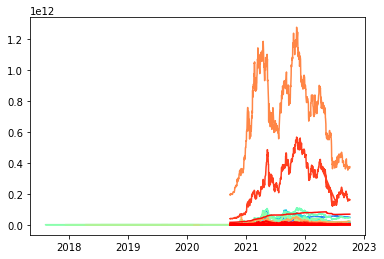

In [16]:
n=len(df_nomiss.uid.unique())
colors = plt.cm.rainbow(np.linspace(0, 1, n))

for i in range(len((df_nomiss.uid.unique()))):
    plt.plot(CoinL[i]['date'],CoinL[i]['quote.USD.market_cap'],color=colors[i])
plt.show()


In [17]:
curD=df_nomiss.loc[curI[0]]
curDM=curD['quote.USD.market_cap'].max()


In [18]:
Sel_C=[]
for i in range(len(df_nomiss.uid.unique())):
    curD=df_nomiss.loc[curI[i]]
    curDM=curD['quote.USD.market_cap'].max()
    Sel_C.append((curDM,i))
    
Sel_C.sort()

In [19]:
Sel_C[-1]

(1276427719704.95, 1129)

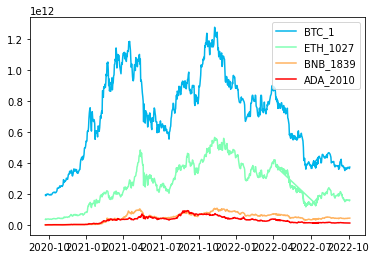

In [20]:
# df_nomiss.query('symbol == "BTC"')


colors = plt.cm.rainbow(np.linspace(0, 1, 5))

for i in range(1,5):
    plt.plot(CoinL[Sel_C[0-i][1]]['date'],CoinL[Sel_C[0-i][1]]['quote.USD.market_cap'],color=colors[i],label=CoinL[Sel_C[0-i][1]]['uid'][0])
plt.legend()
plt.show()


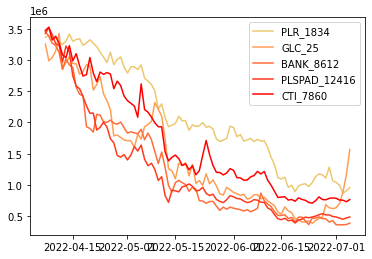

In [48]:
colors = plt.cm.rainbow(np.linspace(0, 1, 15))

for i in range(10,15):
    plt.plot(CoinL[Sel_C[i][1]]['date'],CoinL[Sel_C[i][1]]['quote.USD.market_cap'],color=colors[i],label=CoinL[Sel_C[i][1]]['uid'][0])
plt.legend()
plt.show()


In [49]:
df_nomiss.shape

(742019, 14)

In [50]:
df_nomiss.dropna().shape

(742019, 14)

In [51]:
df_nomiss.dtypes

time_open                       object
time_high                       object
time_low                        object
quote.USD.open                 float64
quote.USD.high                 float64
quote.USD.low                  float64
quote.USD.close                float64
quote.USD.volume               float64
quote.USD.market_cap           float64
quote.USD.timestamp             object
symbol                          object
id                               int64
uid                             object
date                    datetime64[ns]
dtype: object

In [52]:
df_nomiss.isnull().any()

time_open               False
time_high               False
time_low                False
quote.USD.open          False
quote.USD.high          False
quote.USD.low           False
quote.USD.close         False
quote.USD.volume        False
quote.USD.market_cap    False
quote.USD.timestamp     False
symbol                  False
id                      False
uid                     False
date                    False
dtype: bool

In [53]:
df_nomiss.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
quote.USD.open,742019.0,3.835850e+02,4.119116e+03,0.000000e+00,3.374760e-02,2.875130e-01,2.014665e+00,1.710106e+05
quote.USD.high,742019.0,3.863548e+02,4.149026e+03,0.000000e+00,3.419714e-02,2.908852e-01,2.038999e+00,1.733846e+05
quote.USD.low,742019.0,3.805772e+02,4.085290e+03,0.000000e+00,3.330915e-02,2.838410e-01,1.987739e+00,1.703835e+05
quote.USD.close,742019.0,3.834919e+02,4.117638e+03,0.000000e+00,3.373030e-02,2.871819e-01,2.011999e+00,1.733846e+05
quote.USD.volume,742019.0,1.212272e+10,5.749468e+12,0.000000e+00,2.212874e+05,1.460568e+06,1.147851e+07,3.665774e+15
quote.USD.market_cap,742019.0,1.659988e+09,2.628066e+10,-1.366289e+09,8.464712e+06,3.178227e+07,1.387857e+08,1.276428e+12
id,742019.0,5.578674e+03,3.256602e+03,1.000000e+00,2.861000e+03,5.224000e+03,7.805000e+03,2.070100e+04


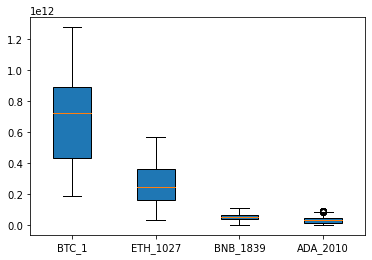

In [55]:
top4 = ["BTC_1","ETH_1027", "BNB_1839", "ADA_2010"]

BTC = df_nomiss.loc[top4[0]]['quote.USD.market_cap']
ETH = df_nomiss.loc[top4[1]]['quote.USD.market_cap']
BNB = df_nomiss.loc[top4[2]]['quote.USD.market_cap']
ADA = df_nomiss.loc[top4[3]]['quote.USD.market_cap']

data= [BTC,ETH,BNB,ADA]

plt.boxplot(data,vert=True, patch_artist=True, labels=top4) 
plt.show()

In [61]:
for i in range(4):
    print(top4[i])
    print(data[i].describe().transpose())
    print('\n')

BTC_1
count    7.680000e+02
mean     6.973923e+11
std      2.696439e+11
min      1.904390e+11
25%      4.354616e+11
50%      7.253307e+11
75%      8.929815e+11
max      1.276428e+12
Name: quote.USD.market_cap, dtype: float64


ETH_1027
count    8.480000e+02
mean     2.625158e+11
std      1.309961e+11
min      3.638855e+10
25%      1.634626e+11
50%      2.460583e+11
75%      3.637090e+11
max      5.664594e+11
Name: quote.USD.market_cap, dtype: float64


BNB_1839
count    7.670000e+02
mean     5.130495e+10
std      2.803531e+10
min      3.328067e+09
25%      3.828743e+10
50%      5.188302e+10
75%      7.009700e+10
max      1.096421e+11
Name: quote.USD.market_cap, dtype: float64


ADA_2010
count    7.680000e+02
mean     3.327544e+10
std      2.185936e+10
min      2.398939e+09
25%      1.569942e+10
50%      3.314008e+10
75%      4.455630e+10
max      9.442598e+10
Name: quote.USD.market_cap, dtype: float64


